In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from datetime import datetime

In [43]:
data = pd.read_csv('./dataset/public_data/train.csv')

data1 = data.iloc[:,:2]
data2 = data.iloc[:,2:] 

# a ~ u : 농산물 이름 / 1 : 거래량, 2 : 가격 
agrnm = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u']
colname = []
for i in agrnm :
  for j in range(1,3) :
    colname.append(str(i)+str(j))

data1.columns = ['date','day']
data2.columns = colname

data = pd.concat([data1, data2], axis=1)
print(data)

            date  day         a1      a2         b1      b2         c1  \
0     2016-01-01  금요일        0.0     0.0        0.0     0.0        0.0   
1     2016-01-02  토요일    80860.0   329.0    80272.0   360.0   122787.5   
2     2016-01-03  일요일        0.0     0.0        0.0     0.0        0.0   
3     2016-01-04  월요일  1422742.5   478.0  1699653.7   382.0  2315079.0   
4     2016-01-05  화요일  1167241.0   442.0  1423482.3   422.0  2092960.1   
...          ...  ...        ...     ...        ...     ...        ...   
1728  2020-09-24  목요일  1856965.0  1839.0  2055640.0   990.0  2281429.2   
1729  2020-09-25  금요일  1880095.5  1789.0  1879261.0  1011.0  2074513.0   
1730  2020-09-26  토요일  1661090.9  1760.0  1709385.7  1075.0  2089081.2   
1731  2020-09-27  일요일    25396.0  3066.0    38222.0  1139.0    18240.0   
1732  2020-09-28  월요일  2405051.9  1867.0  2747519.5  1147.0  2235784.7   

          c2      d1       d2  ...       q1      q2        r1      r2  \
0        0.0     0.0      0.0  ...    

# 배추로 탐색해보기

In [98]:
#배추 거래량, 가격
data_a = data.loc[:,['date','day','a1','a2']]
pd.to_datetime(data_a['date'])
# data_a = data_a.set_index('date')
print(data_a)

            date  day         a1      a2
0     2016-01-01  금요일        0.0     0.0
1     2016-01-02  토요일    80860.0   329.0
2     2016-01-03  일요일        0.0     0.0
3     2016-01-04  월요일  1422742.5   478.0
4     2016-01-05  화요일  1167241.0   442.0
...          ...  ...        ...     ...
1728  2020-09-24  목요일  1856965.0  1839.0
1729  2020-09-25  금요일  1880095.5  1789.0
1730  2020-09-26  토요일  1661090.9  1760.0
1731  2020-09-27  일요일    25396.0  3066.0
1732  2020-09-28  월요일  2405051.9  1867.0

[1733 rows x 4 columns]


In [99]:
print(data_a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1733 non-null   object 
 1   day     1733 non-null   object 
 2   a1      1733 non-null   float64
 3   a2      1733 non-null   float64
dtypes: float64(2), object(2)
memory usage: 54.3+ KB
None


In [107]:
data_a_16 = data_a[data_a.date.str.contains('2016')]
data_a_16_MO = data_a_16[data_a_16.day==('월요일')]
data_a_16_TU = data_a_16[data_a_16.day==('화요일')]
data_a_16_WE = data_a_16[data_a_16.day==('수요일')]
data_a_16_TH = data_a_16[data_a_16.day==('목요일')]
data_a_16_FR = data_a_16[data_a_16.day==('금요일')]
data_a_16_SA = data_a_16[data_a_16.day==('토요일')]
data_a_16_SU = data_a_16[data_a_16.day==('일요일')]


print(data_a_16.info())
print(data_a_16.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   day     366 non-null    object 
 2   a1      366 non-null    float64
 3   a2      366 non-null    float64
dtypes: float64(2), object(2)
memory usage: 14.3+ KB
None
           date  day         a1      a2
361  2016-12-27  화요일  1034394.0   821.0
362  2016-12-28  수요일  1176685.5   747.0
363  2016-12-29  목요일   981514.0   790.0
364  2016-12-30  금요일   803130.0   839.0
365  2016-12-31  토요일   303761.4  1070.0


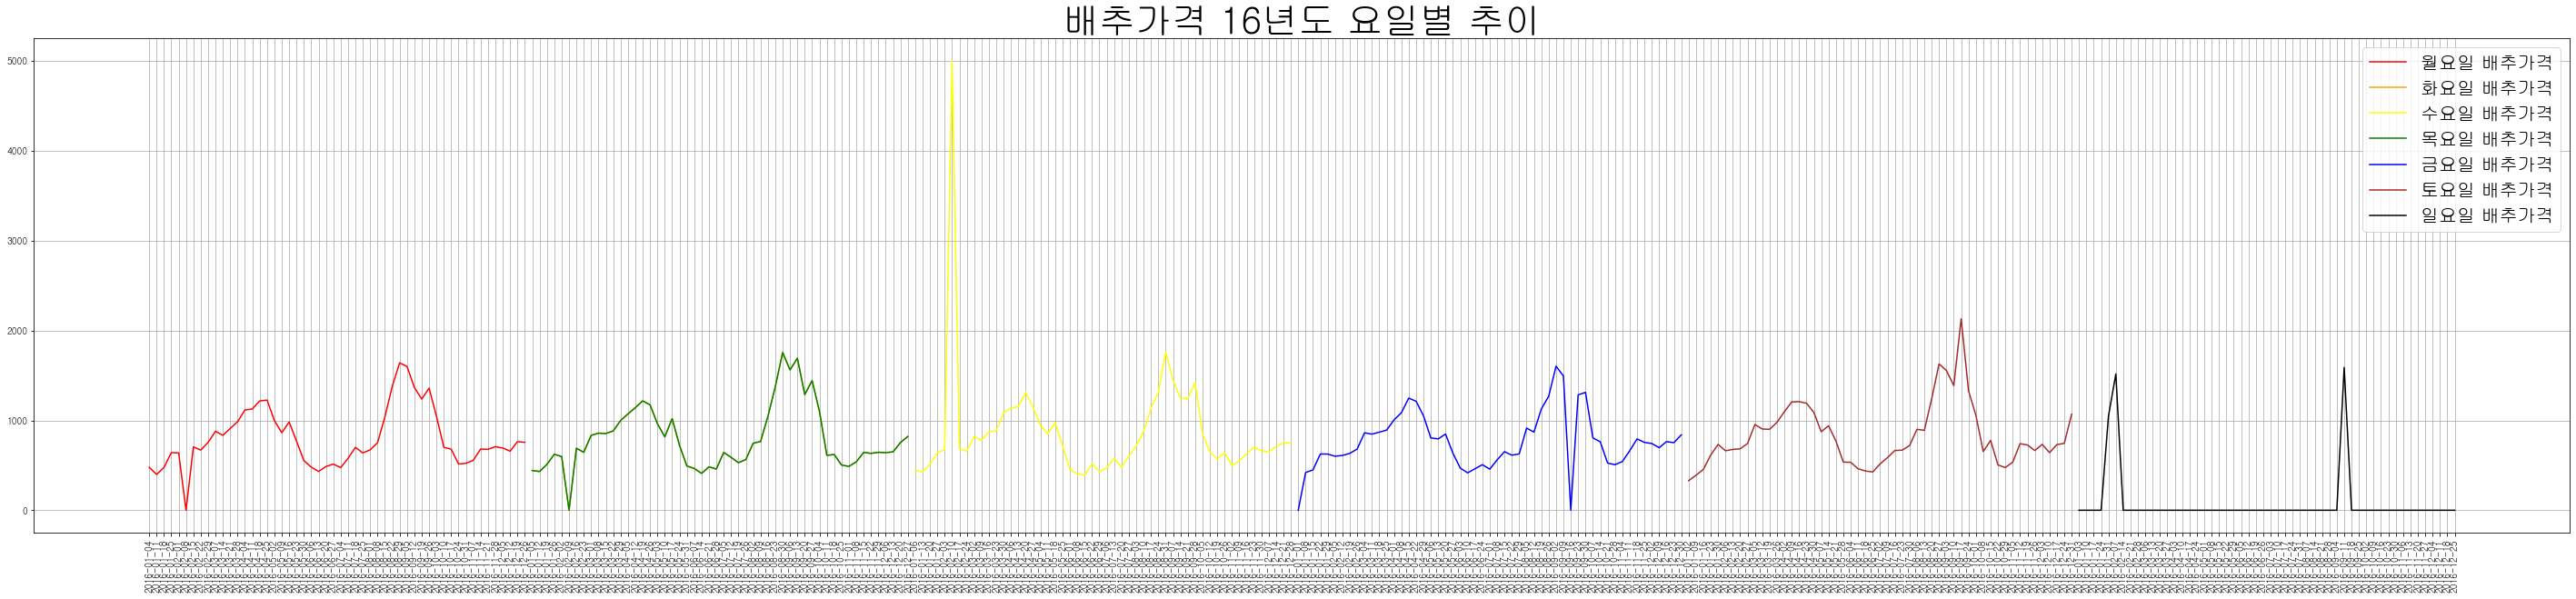

In [125]:
# 폰트 깨질때 
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

fig = plt.figure(figsize=(50,10))
fig.set_facecolor('white')
ax = fig.add_subplot()

plt.title("배추가격 16년도 요일별 추이" , fontsize=40)
plt.plot(data_a_16_MO["date"], data_a_16_MO["a2"], "-", color='red', label='월요일 배추가격')
plt.plot(data_a_16_TU["date"], data_a_16_TU["a2"], "-", color='orange', label='화요일 배추가격')
plt.plot(data_a_16_WE["date"], data_a_16_WE["a2"], "-", color='yellow', label='수요일 배추가격')
plt.plot(data_a_16_TU["date"], data_a_16_TU["a2"], "-", color='green', label='목요일 배추가격')
plt.plot(data_a_16_FR["date"], data_a_16_FR["a2"], "-", color='blue', label='금요일 배추가격')
plt.plot(data_a_16_SA["date"], data_a_16_SA["a2"], "-", color='brown', label='토요일 배추가격')
plt.plot(data_a_16_SU["date"], data_a_16_SU["a2"], "-", color='black', label='일요일 배추가격')
plt.grid()
plt.legend(fontsize=20)
plt.xticks(rotation=90)
plt.show()

TypeError: '('2016', slice(None, None, None))' is an invalid key

In [3]:
print('데이터 shape :',data.shape,'\n')
print('컬럼별 요약통계 : ', '\n', data.describe(), '\n')
print('빈도 계산 : ', '\n', data.value_counts(), '\n')

데이터 shape : (1733, 44) 

컬럼별 요약통계 :  
          배추_거래량(kg)  배추_가격(원/kg)     무_거래량(kg)   무_가격(원/kg)    양파_거래량(kg)  \
count  1.733000e+03  1733.000000  1.733000e+03  1733.000000  1.733000e+03   
mean   1.113022e+06   597.120600  1.274344e+06   490.738604  1.656628e+06   
std    8.376334e+05   410.151434  7.065624e+05   299.193862  9.506928e+05   
min    0.000000e+00     0.000000  0.000000e+00     0.000000  0.000000e+00   
25%    6.892023e+05   335.000000  1.008677e+06   324.000000  1.334250e+06   
50%    1.061471e+06   577.000000  1.374790e+06   453.000000  1.703356e+06   
75%    1.385737e+06   805.000000  1.661663e+06   717.000000  2.143338e+06   
max    5.210215e+06  5000.000000  3.859746e+06  1360.000000  5.024753e+06   

       양파_가격(원/kg)    건고추_거래량(kg)   건고추_가격(원/kg)    마늘_거래량(kg)  마늘_가격(원/kg)  \
count  1733.000000    1733.000000    1733.000000  1.733000e+03  1733.000000   
mean    652.812464    3578.541546    9537.642239  1.383455e+05  3433.506636   
std     366.613456   24139.188

In [5]:
data.groupby('요일')[['배추_거래량(kg)']].describe().unstack('')

KeyError: 'Requested level () does not match index name (요일)'

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import multiprocessing
import pickle

In [15]:
def preprocessing(tsalet_file):
    unique_pum = [
        "배추",
        "무",
        "양파",
        "건고추",
        "마늘",
        "대파",
        "얼갈이배추",
        "양배추",
        "깻잎",
        "시금치",
        "미나리",
        "당근",
        "파프리카",
        "새송이",
        "팽이버섯",
        "토마토",
    ]

    unique_kind = ["청상추", "백다다기", "애호박", "캠벨얼리", "샤인머스캇"]

    train_dict = {"data": []}

    for sub in unique_pum:
        train_dict[f"{sub}_거래량(kg)"] = []
        train_dict[f"{sub}_가격(원/kg)"] = []

    for sub in unique_kind:
        train_dict[f"{sub}_거래량(kg)"] = []
        train_dict[f"{sub}_가격(원/kg)"] = []

    tsalet_sample = pd.read_csv(tsalet_file)
    days = sorted(tsalet_sample["SALEDATE"].unique())
    for day in days:
        train_dict["date"].append(day)

        for sub in unique_pum:
            # 날짜별, 품목별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[
                (tsalet_sample["SALEDATE"] == day) & (tsalet_sample["PUM_NM"] == sub) & (tsalet_sample["TOT_QTY"] > 0)
            ]
            if c.shape[0] == 0:
                train_dict[f"{sub}_거래량(kg)"].append(0)
                train_dict[f"{sub}_가격(원/kg)"].append(0)
            else:
                tot_amt = c["TOT_AMT"].sum().astype(float)
                tot_qty = c["TOT_QTY"].sum().astype(float)
                mean_price = tot_amt / (tot_qty + 1e-20)
                train_dict[f"{sub}_거래량(kg)"].append(tot_qty)
                train_dict[f"{sub}_가격(원/kg)"].append(mean_price)

        for sub in unique_kind:
            # 날짜별, 품종별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[
                (tsalet_sample["SALEDATE"] == day) & (tsalet_sample["KIND_NM"] == sub) & (tsalet_sample["TOT_QTY"] > 0)
            ]
            if c.shape[0] == 0:
                train_dict[f"{sub}_거래량(kg)"].append(0)
                train_dict[f"{sub}_가격(원/kg)"].append(0)
            else:
                tot_amt = c["TOT_AMT"].sum().astype(float)
                tot_qty = c["TOT_QTY"].sum().astype(float)
                mean_price = round(tot_amt / (tot_qty + 1e-20))
                tot_qty = round(tot_qty, 1)
                train_dict[f"{sub}_거래량(kg)"].append(tot_qty)
                train_dict[f"{sub}_가격(원/kg)"].append(mean_price)

    with open(f'./data/public_data/dict/{tsalet_file.split("/")[-1].split(".")[0]}.pkl', "wb") as f:
        pickle.dump(train_dict, f)

In [22]:
tsalet_files = sorted(glob("./dataset/public_data/train_AT_TSALET_ALL/*"))

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
pool.map(preprocessing, tsalet_files)
pool.close()
pool.join()

In [20]:
dict_files = sorted(glob("./data/public_data/dict/*.pkl"))

train_dict_list = []
for dict_file in dict_files:
    with open(dict_file, "rb") as f:
        train_dict = pickle.load(f)
    train_dict_list.append(train_dict)

train_dict_list

[]

In [18]:
train = None

for train_dcit in train_dict_list:
    if train is None:
        train = pd.DataFrame(train_dcit)
    else:
        train = pd.concat([train, pd.DataFrame(train_dcit)])

In [19]:
train["date"] = train.date.astype(str).str.replace("-", "")
train["date"] = pd.to_datetime(train.date, format='%Y%m%d')

AttributeError: 'NoneType' object has no attribute 'date'